## import Lib

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




In [6]:
df = pd.read_csv("iris.csv")

## Load dataset

In [7]:


# Load the dataset
df = pd.read_csv("iris.csv")

# Display the first few rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### describe dtaset

In [8]:
# Display descriptive statistics
print(df.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


## Selecting features and plotting histogram and boxplot

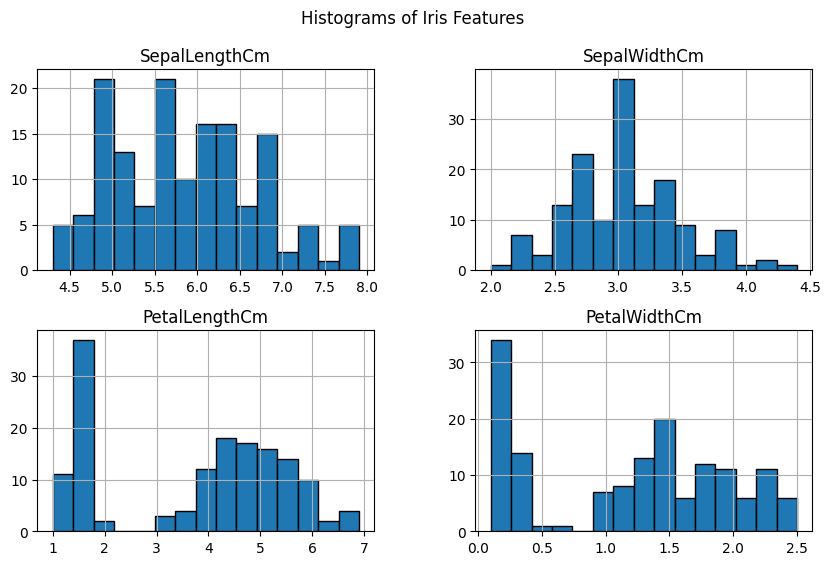

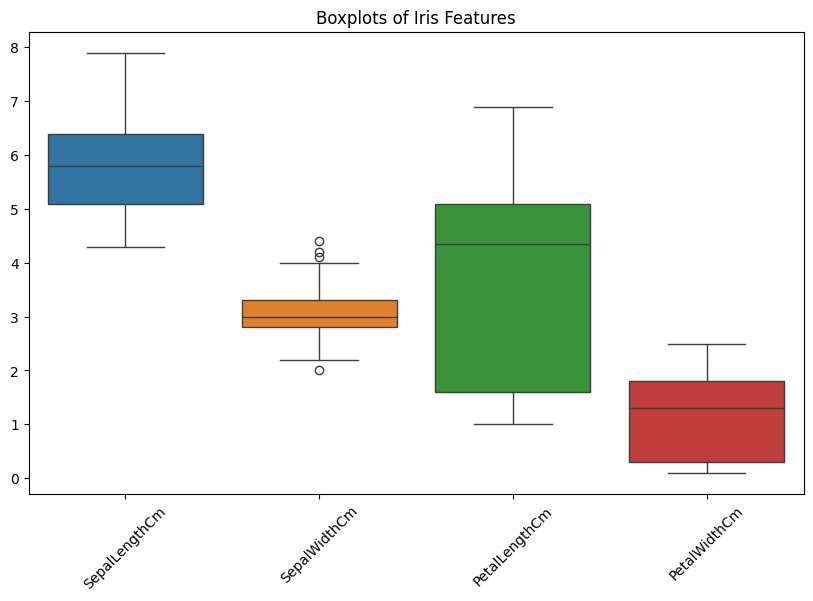

In [ ]:

# Drop the 'ID' column 
df_numeric = df.select_dtypes(include=['number']).drop(columns=['Id'], errors='ignore')

# Create histograms for numerical features
df_numeric.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.show()

# Create boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplots of Iris Features")
plt.xticks(rotation=45)
plt.show()


## Correlation matrix

In [24]:
df_numeric = df.select_dtypes(include=['number']).drop(columns=['ID'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
print(correlation_matrix)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


## Most Strongly Correlated Features:

* PetalLengthCm and PetalWidthCm → 0.96 (Very Strong Positive Correlation)
* As petal length increases, petal width also increases significantly.
* SepalLengthCm and PetalLengthCm → 0.87 (Strong Positive Correlation)
* Longer sepals are associated with longer petals.
* SepalLengthCm and PetalWidthCm → 0.82 (Strong Positive Correlation)
* Longer sepals are also associated with wider petals.

## Weak or Negative Correlations:

* SepalWidthCm and PetalLengthCm → -0.42 (Moderate Negative Correlation)
* Wider sepals tend to have shorter petals.
* SepalWidthCm and SepalLengthCm → -0.11 (Weak Negative Correlation)
* Almost no relationship between sepal width and sepal length.

## Bayees Theorem

In [25]:
# Define the contingency table as a NumPy array
table = np.array([[30, 20],  # Row for A
                  [50, 100]]) # Row for not A

# Compute the total number of events
total = np.sum(table)

# Compute probabilities
P_B = np.sum(table[:, 0]) / total  # P(B) = (A ∩ B + not A ∩ B) / total
P_A = np.sum(table[0, :]) / total  # P(A) = (A ∩ B + A ∩ not B) / total

# Compute conditional probabilities
P_A_given_B = table[0, 0] / np.sum(table[:, 0])  # P(A | B) = (A ∩ B) / P(B)
P_B_given_A = table[0, 0] / np.sum(table[0, :])  # P(B | A) = (A ∩ B) / P(A)

# Print results
print("P(A | B):", P_A_given_B)
print("P(B | A):", P_B_given_A)

P(A | B): 0.375
P(B | A): 0.6


In [27]:
from sympy import symbols, Eq, solve

# Define symbols
P_Spam, P_NotSpam = 0.2, 0.8
P_Keyword_given_Spam, P_Keyword_given_NotSpam = 0.7, 0.1
P_Spam_given_Keyword = symbols("P_Spam_given_Keyword")

# Compute P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_NotSpam * P_NotSpam)

# Apply Bayes' Theorem equation
eq = Eq(P_Spam_given_Keyword, (P_Keyword_given_Spam * P_Spam) / P_Keyword)

# Solve for P(Spam | Keyword)
result = solve(eq, P_Spam_given_Keyword)[0]

print("P(Spam | Keyword):", float(result))


P(Spam | Keyword): 0.6363636363636364
